# OD数据处理与分析测试与说明
### 李军 2017.11

In [1]:
import xlrd
bk = xlrd.open_workbook('test.xlsx')
shxrange = range(bk.nsheets)
try:
    sh = bk.sheet_by_name("Sheet1")
except:
    print ("no sheet in %s named Sheet1" % fname)
#获取行数
nrows = sh.nrows
#获取列数
ncols = sh.ncols

从excel表中加载OD网络原始数据！

In [2]:
print ("nrows %d, ncols %d" % (nrows,ncols))

nrows 12, ncols 12


行列数检查无误

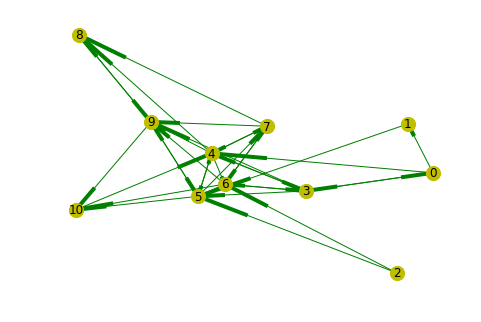

In [76]:
import matplotlib.pyplot as plt
import networkx as nx
G=nx.DiGraph()
H = nx.path_graph(ncols-1)
G.add_nodes_from(H)
for i in range(1,ncols):
    for j in range(1,ncols):
        if(sh.cell_value(i,j)!=0):
            G.add_edge((i-1),(j-1))
            G[i-1][j-1]['weight'] = sh.cell_value(i,j)
nx.draw(G,pos = nx.spring_layout(G),with_labels=True,node_size=200,edge_color='g',node_color='y')
plt.show()

利用network包来绘制简单有向图（即点与点之间不允许有重复边）！并借助matplotlib包中的pyplot工具来使网络输出并存储为PNG图片！

节点0的PageRank值是：0.02736540427998302
节点1的PageRank值是：0.01751313309096722
节点2的PageRank值是：0.02371541502088644
节点3的PageRank值是：0.0444435625195619
节点4的PageRank值是：0.09998527192084988
节点5的PageRank值是：0.245461477205365
节点6的PageRank值是：0.08809502515482705
节点7的PageRank值是：0.08943049540903213
节点8的PageRank值是：0.12037240474353328
节点9的PageRank值是：0.12925401741985545
节点10的PageRank值是：0.11436379323513873
各节点的page值之和是: 1.0


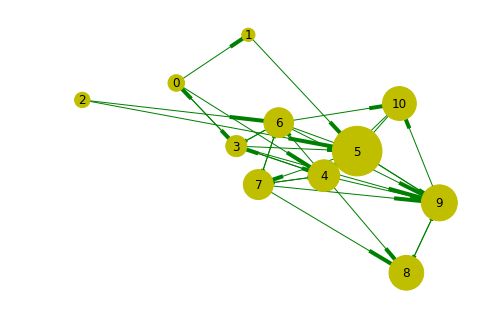

In [87]:
pr=nx.pagerank(G,alpha=0.85)
p1=list(pr)
p2=tuple(pr.values())
for i in range(0,ncols-1):
    print ("节点"+str(p1[i])+"的PageRank值是："+str(p2[i]))
print('各节点的page值之和是:',sum(p2))
plt.close()
nx.draw(G, pos = nx.spring_layout(G), node_size=[x * 10000 for x in pr.values()],node_color='y',with_labels=True,edge_color='g')
plt.show()

d调用系统函数求解无personalization时的pagerank情况,并将其可视化

In [88]:
file_path="Practice1_Result\\pagerank.txt"
f=open(file_path, "w")
for x in range(0,ncols-1):
    f.write(str(p1[x]))
    f.write(' ')
    f.write(str(p2[x]))
    f.write('\n')
f.close()

将PageRank计算的值写入到pagerank.txt文本文件当中去

0的特征向量中心性是：0.05644304128008845
1的特征向量中心性是：0.012667373872774189
2的特征向量中心性是：4.937652254229674e-10
3的特征向量中心性是：0.19505745458884252
4的特征向量中心性是：0.36960831628502544
5的特征向量中心性是：0.39327698910586417
6的特征向量中心性是：0.24803914656167245
7的特征向量中心性是：0.2925238600860263
8的特征向量中心性是：0.3460399630097521
9的特征向量中心性是：0.5337418457334153
10的特征向量中心性是：0.34001701674907736


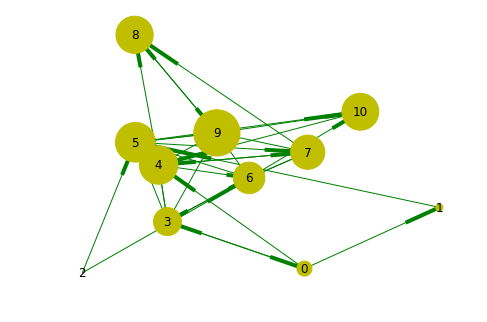

In [142]:
ec=nx.eigenvector_centrality(G)
for key, value in ec.items():
    print (str(key)+'的特征向量中心性是：'+str(value))
plt.close()
nx.draw(G, pos = nx.spring_layout(G), node_size=[x * 4000 for x in ec.values()],node_color='y',with_labels=True,edge_color='g')
plt.show()

调用networkx中的函数计算特征向量中心性（用邻居结点的重要性来概括本结点的重要性）

In [141]:
file_path="Practice1_Result\\特征向量中心性.txt"
f=open(file_path, "w")
for key, value in ec.items():
    f.write(str(key))
    f.write(' ')
    f.write(str(value))
    f.write('\n')
f.close()

写入各顶点的特征向量中心性的值至文本文件

0的度中心性是：0.6000000000000001
1的度中心性是：0.2
2的度中心性是：0.4
3的度中心性是：1.0
4的度中心性是：1.3
5的度中心性是：1.2000000000000002
6的度中心性是：1.1
7的度中心性是：0.9
8的度中心性是：0.6000000000000001
9的度中心性是：1.1
10的度中心性是：0.6000000000000001


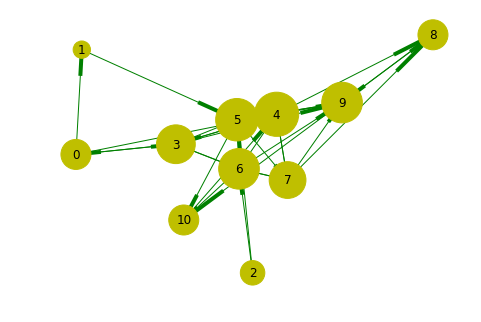

In [146]:
dc=nx.degree_centrality(G)
for key, value in dc.items():
    print (str(key)+'的度中心性是：'+str(value))
plt.close()
nx.draw(G, pos = nx.spring_layout(G), node_size=[x * 1500 for x in dc.values()],node_color='y',with_labels=True,edge_color='g')
plt.show()
file_path="Practice1_Result\\度中心性.txt"
f=open(file_path, "w")
for key, value in dc.items():
    f.write(str(key))
    f.write(' ')
    f.write(str(value))
    f.write('\n')
f.close()

调用函数计算度中心性(度量节点的连接个数),以下为函数文档说明：
The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.
For multigraphs or graphs with self loops the maximum degree might be higher than n-1 and values of degree centrality greater than 1 are possible.